In [1]:
from keras.models import load_model
from keras import models
from keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
folder_dir = os.getcwd()
# folder_dir = './code/chap05'
original_models_dir = folder_dir + '/models/'

model = load_model(original_models_dir + 'cats_and_dogs_small_2.h5')
print(model.summary())

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                             

2022-04-03 18:41:22.971683: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-03 18:41:22.971918: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
img_path = '/datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'

img = image.load_img(folder_dir + img_path, target_size=(150, 150))
print(f"type(img)          : {type(img)}")

img_tensor = image.img_to_array(img)
print(f"type(img_tensor)   : {type(img_tensor)}")
print(f"img_tensor.shape   : {img_tensor.shape}")
print()

# reshape or expand_dims
img_tensor = np.expand_dims(img_tensor, axis=0)
print(f"type(img_tensor)   : {type(img_tensor)}")
print(f"img_tensor.shape   : {img_tensor.shape}")
print(f"np.max(img_tensor) : {np.max(img_tensor)}")
print(f"np.min(img_tensor) : {np.min(img_tensor)}")
print()

img_tensor /= 255.
print(f"type(img_tensor)   : {type(img_tensor)}")
print(f"img_tensor.shape   : {img_tensor.shape}")
print(f"np.max(img_tensor) : {np.max(img_tensor)}")
print(f"np.min(img_tensor) : {np.min(img_tensor)}")
print()

type(img)          : <class 'PIL.Image.Image'>
type(img_tensor)   : <class 'numpy.ndarray'>
img_tensor.shape   : (150, 150, 3)

type(img_tensor)   : <class 'numpy.ndarray'>
img_tensor.shape   : (1, 150, 150, 3)
np.max(img_tensor) : 255.0
np.min(img_tensor) : 0.0

type(img_tensor)   : <class 'numpy.ndarray'>
img_tensor.shape   : (1, 150, 150, 3)
np.max(img_tensor) : 1.0
np.min(img_tensor) : 0.0



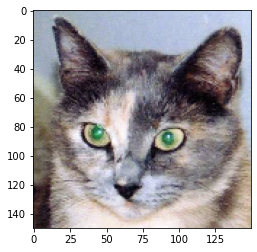

In [4]:
plt.imshow(img_tensor[0])
plt.show()

In [5]:
# Model 클래스 자세한 내용은 7.1절
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# model.inputs[0]: <KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_input')>

print(activation_model.summary())
# conv2d (Conv2D) / Output Shape / (None, 148, 148, 32)
activations = activation_model.predict(img_tensor)
# conv2d   / max_pooling2d   / conv2d_1 / max_pooling2d_1 /
# conv2d_2 / max_pooling2d_2 / conv2d_3 / max_pooling2d_3 /

first_layer_activation = activations[0]
print(first_layer_activation.shape)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856 

2022-04-03 18:41:23.372908: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-03 18:41:23.491030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


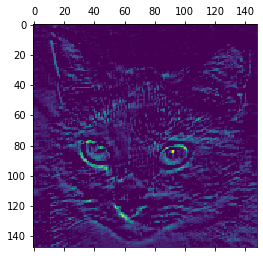

In [6]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.show()

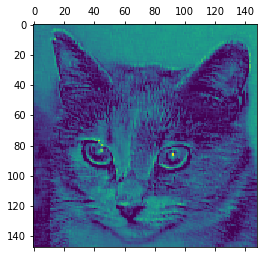

In [7]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

<ipython-input-8-5933153a30e5>:19: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


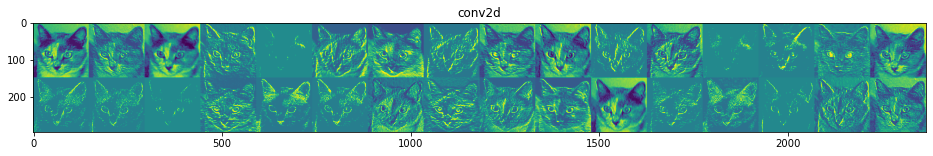

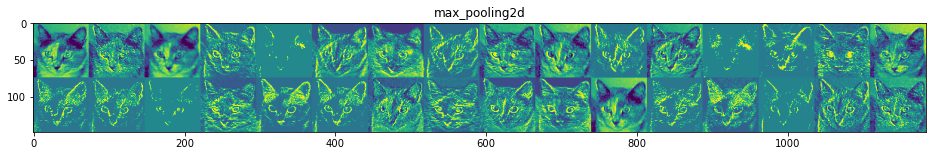

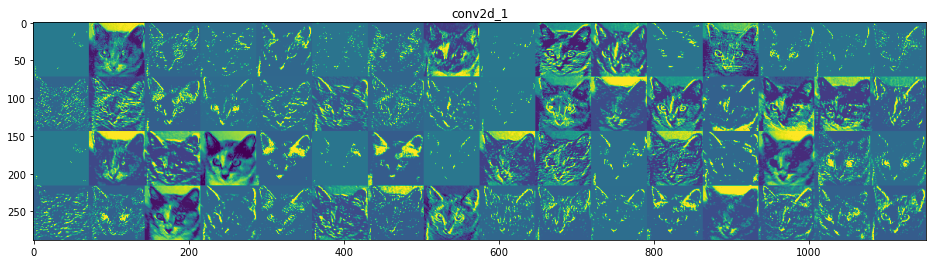

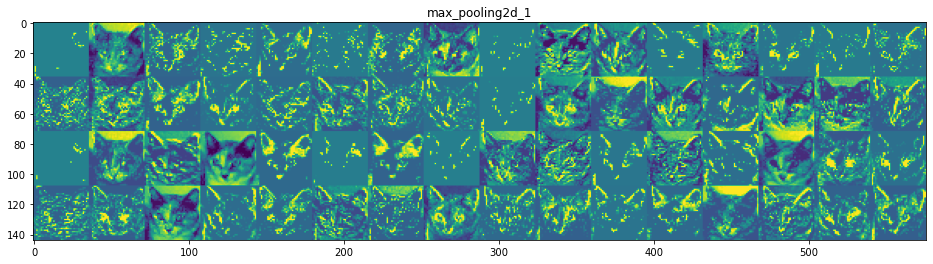

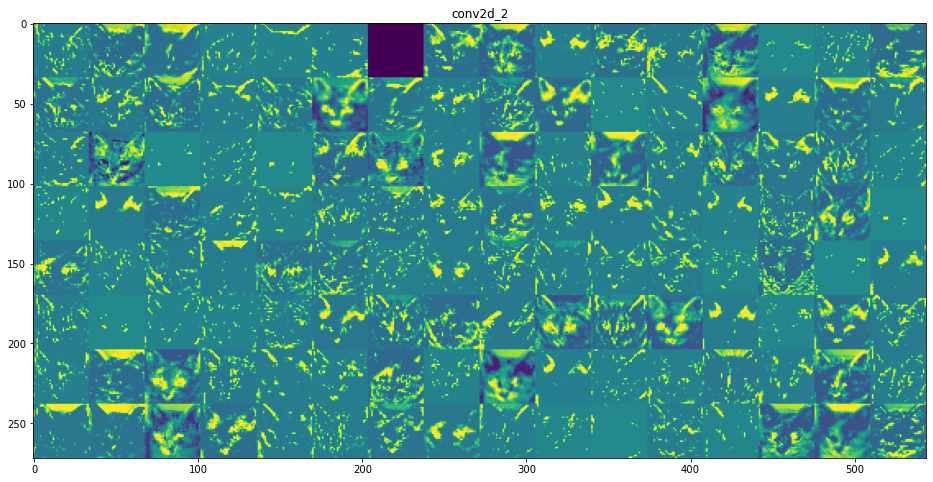

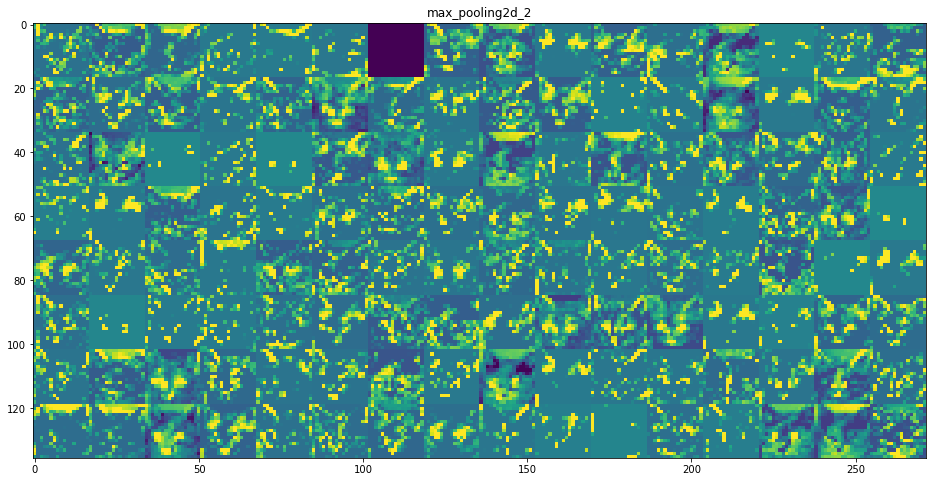

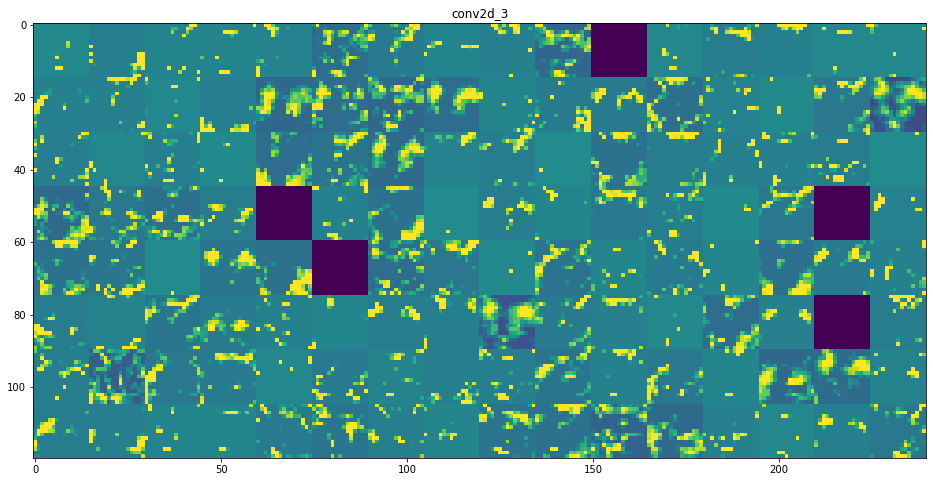

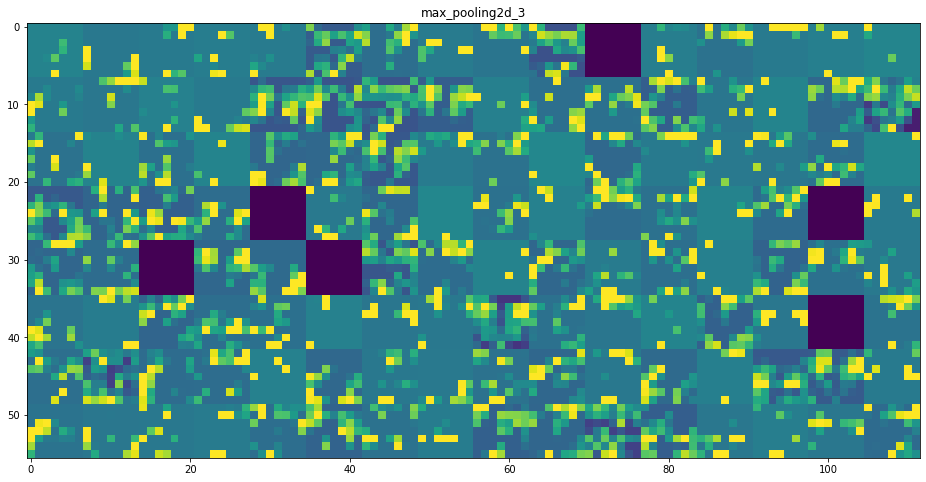

In [8]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()